In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,f1_score,precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df1 = pd.read_csv('/content/train.csv')

In [73]:
df2 = pd.read_csv('/content/test.csv')

In [74]:
df = pd.concat([df1,df2])

In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [77]:
df.shape

(1309, 12)

In [78]:
df.dtypes

,0
PassengerId,int64
Survived,float64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [79]:
df['Sex'] = df['Sex'].map({'male':1,'female':0})

In [80]:
df['Survived'].value_counts()

,count
Survived,
0.0,549
1.0,342


In [81]:
df['Survived'].fillna(0,inplace=True)

/tmp/ipython-input-779440456.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Survived'].fillna(0,inplace=True)


In [82]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [83]:
df['Embarked'].fillna('S',inplace=True)

/tmp/ipython-input-3895404187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S',inplace=True)


In [84]:
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})

In [85]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


In [86]:
# Extract deck letter
df['Cabin'] = df['Cabin'].fillna('U')       # U = Unknown
df['Cabin_deck'] = df['Cabin'].str[0]       # take first letter

# Convert letters to integers
df['Cabin_deck'] = df['Cabin_deck'].astype('category').cat.codes

In [87]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


In [88]:
df.drop(['Cabin'],axis=1,inplace=True)

In [89]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

/tmp/ipython-input-1005235208.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mean(),inplace=True)


In [90]:
df.dtypes

,0
PassengerId,int64
Survived,float64
Pclass,int64
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [91]:
df['Ticket_len'] = df['Ticket'].apply(len)

In [92]:
df.drop(['Ticket'],axis=1,inplace=True)

In [93]:
df.drop(['Name'],axis=1,inplace = True)

In [94]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [95]:
x = df.drop(['Survived'],axis=1)
y = df['Survived']

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [97]:
dt = DecisionTreeClassifier()

In [98]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [99]:
pred = dt.predict(x_test)

In [100]:
accuracy_score(y_test,pred) #809 with passendgerid

0.7251908396946565

In [101]:
cm = confusion_matrix(y_test,pred)

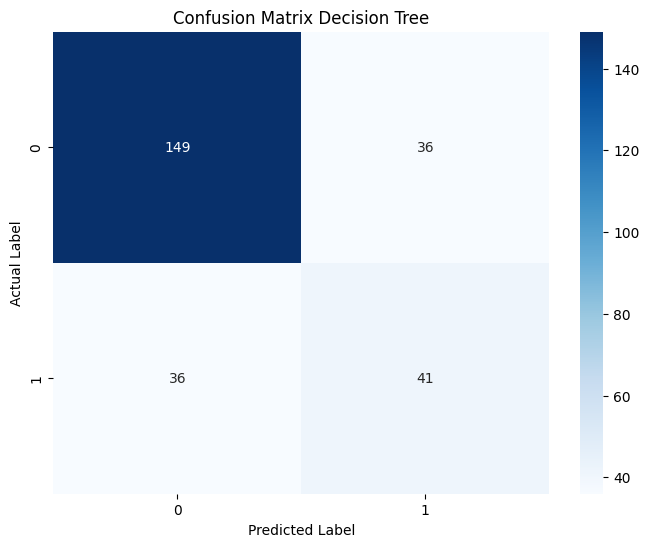

In [102]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Decision Tree')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [103]:
for importance, name in sorted(zip(dt.feature_importances_, x_train.columns),reverse=True):
  print (name, importance) #sex column has no contricution we can drop it and get the same result

Age 0.3269855364456553
Fare 0.21418189696515177
Sex 0.15391769863432553
Ticket_len 0.08253269461191175
SibSp 0.055907401015233206
Cabin_deck 0.05197168468659156
Pclass 0.048514201790390205
Embarked 0.03408669897602479
Parch 0.03190218687471585


In [104]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred2 = lr.predict(x_test)
accuracy_score(y_test,pred2) #80 without passenger id

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8015267175572519

In [105]:
cmm = confusion_matrix(y_test,pred2)

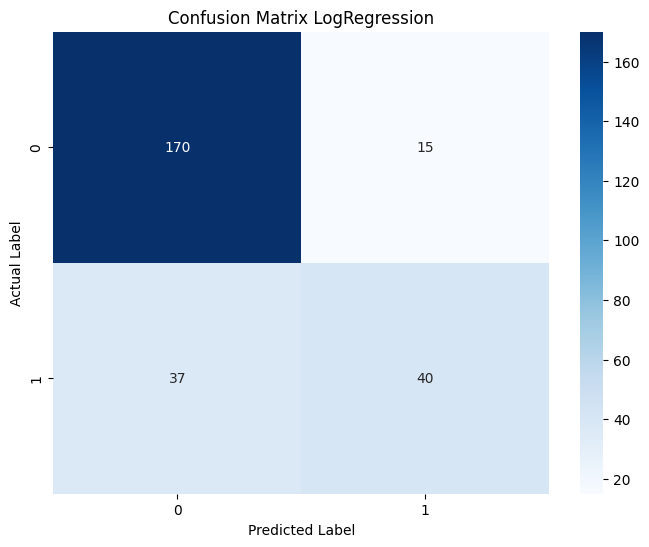

In [106]:
plt.figure(figsize=(8, 6))
sns.heatmap(cmm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix LogRegression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [107]:
kn = KNeighborsClassifier(n_neighbors=9)
kn.fit(x_train,y_train)
pred3 = kn.predict(x_test)
accuracy_score(y_test,pred3) #72 with passenger id

0.7175572519083969

In [108]:
cmmm = confusion_matrix(y_test,pred3)

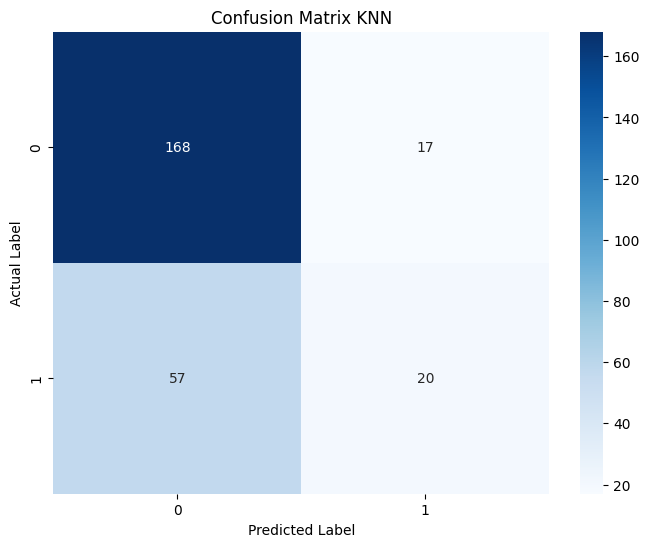

In [109]:
plt.figure(figsize=(8, 6))
sns.heatmap(cmmm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix KNN')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [110]:
param_grid = {
    'criterion':['gini','entropy'], #Calculating Information gain through Gini or Entropy
    'splitter':['best','random'], #split on best or random column. random can help reduce overfitiing
    'max_depth':[4,8,10,13], #maximum depth of tree if none then chances are of overfiting
    'max_features':['sqrt','log2',None], #max no of columns allowed we can reduce it to give some column to reduce overfitting
    'min_samples_leaf':[6,10], # resulting leaf will never have more then these numbers
}
reg = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid)
reg.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 10, 13],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [6, 10],
                         'splitter': ['best', 'random']})

In [111]:
reg.best_score_ #86 with passenger id 79 without

np.float64(0.7898883572567783)

In [112]:
cm2 = confusion_matrix(y_test,reg.predict(x_test))

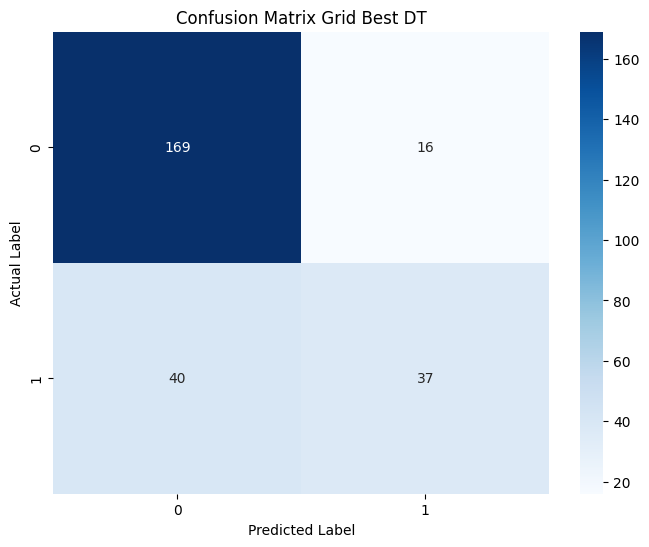

In [113]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Grid Best DT')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [114]:
reg.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [115]:
param_grid = {
    'criterion':['gini','entropy'], #Calculating Information gain through Gini or Entropy
    'splitter':['best','random'], #split on best or random column. random can help reduce overfitiing
    'max_depth':[2,4,8,10,13], #maximum depth of tree if none then chances are of overfiting
    'max_features':['sqrt','log2',None], #max no of columns allowed we can reduce it to give some column to reduce overfitting
    'min_samples_leaf':[4,5], # resulting leaf will never have more then these numbers
}
rcv = RandomizedSearchCV(DecisionTreeClassifier(),n_iter=10,cv=5,random_state=4,param_distributions=param_grid)
rcv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 8, 10, 13],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [4, 5],
                                        'splitter': ['best', 'random']},
                   random_state=4)

In [116]:
rcv.best_score_ #86 with passenger id, 78 without

np.float64(0.7822282980177716)

In [117]:
cm3 = confusion_matrix(y_test,rcv.predict(x_test))

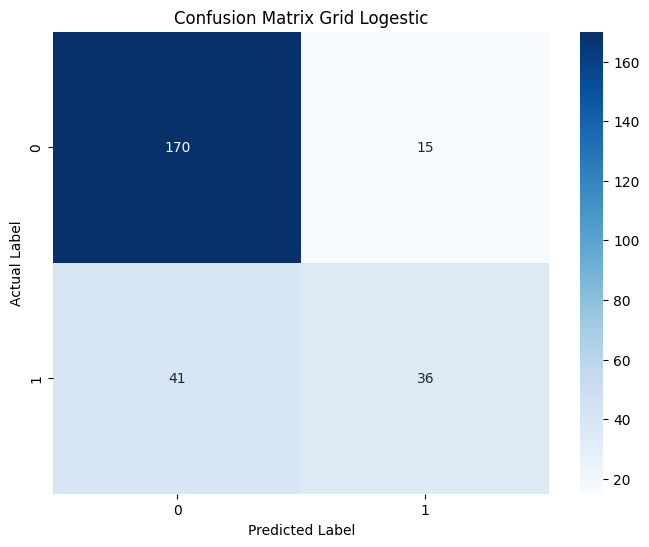

In [118]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Grid Logestic')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [119]:
rcv.best_params_

{'splitter': 'best',
 'min_samples_leaf': 5,
 'max_features': None,
 'max_depth': 4,
 'criterion': 'entropy'}

In [120]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],   # type of regularization
    'C': [0.01, 0.1, 1, 10],                   # inverse of regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],  # solvers
    'max_iter': [100, 200, 500]                     # iterations to ensure convergence
}
lgr = GridSearchCV(LogisticRegression(),param_grid=param_grid)
lgr.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg']})

In [121]:
lgr.best_score_ #83 with passenger id #77 without

np.float64(0.778418774208248)

In [122]:
cm4 = confusion_matrix(y_test,lgr.predict(x_test))

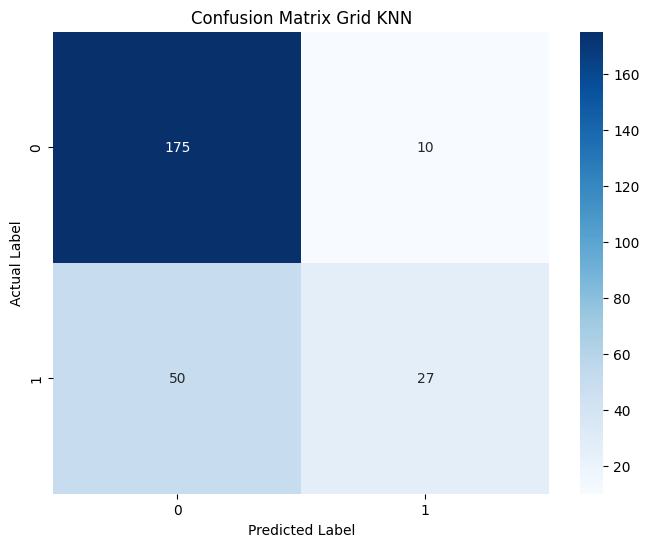

In [123]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Grid KNN')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [124]:
lgr.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}